In [ ]:
# predict weight based on height
# open and read csv file 
library(rpart)
data = read.csv('Cung cap buoi 9/baseball.csv')
print(head(data))
print(is.data.frame(data))
print(ncol(data))
print(nrow(data))

             Name Team       Position Height Weight   Age PosCategory
1   Adam_Donachie  BAL        Catcher     74    180 22.99     Catcher
2       Paul_Bako  BAL        Catcher     74    215 34.69     Catcher
3 Ramon_Hernandez  BAL        Catcher     72    210 30.78     Catcher
4    Kevin_Millar  BAL  First_Baseman     72    210 35.43   Infielder
5     Chris_Gomez  BAL  First_Baseman     73    188 35.71   Infielder
6   Brian_Roberts  BAL Second_Baseman     69    176 29.39   Infielder
[1] TRUE
[1] 7
[1] 1015


In [ ]:
baseball = data[c('Height','Weight')]
print(head(baseball))

  Height Weight
1     74    180
2     74    215
3     72    210
4     72    210
5     73    188
6     69    176


In [ ]:
baseball['Height'] = baseball['Height'] * 0.0254
baseball['Weight'] = baseball['Weight'] * 0.453592

print('After changing data')
print(head(baseball))

[1] "After changing data"
  Height   Weight
1 1.8796 81.64656
2 1.8796 97.52228
3 1.8288 95.25432
4 1.8288 95.25432
5 1.8542 85.27530
6 1.7526 79.83219


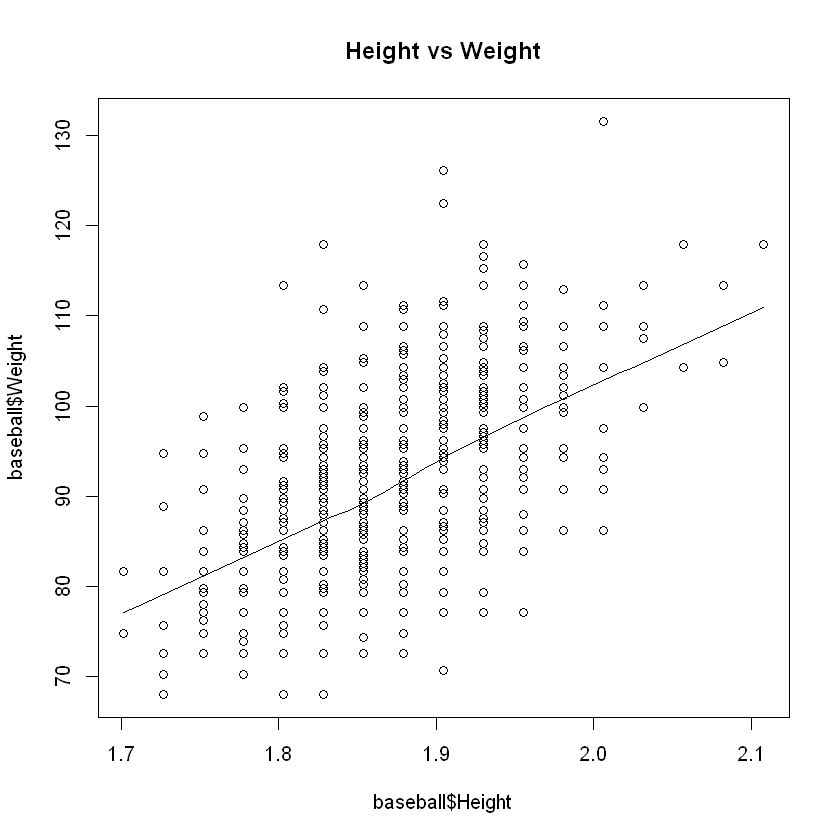

In [ ]:
scatter.smooth(x=baseball$Height,
               y=baseball$Weight,
               main='Height vs Weight')

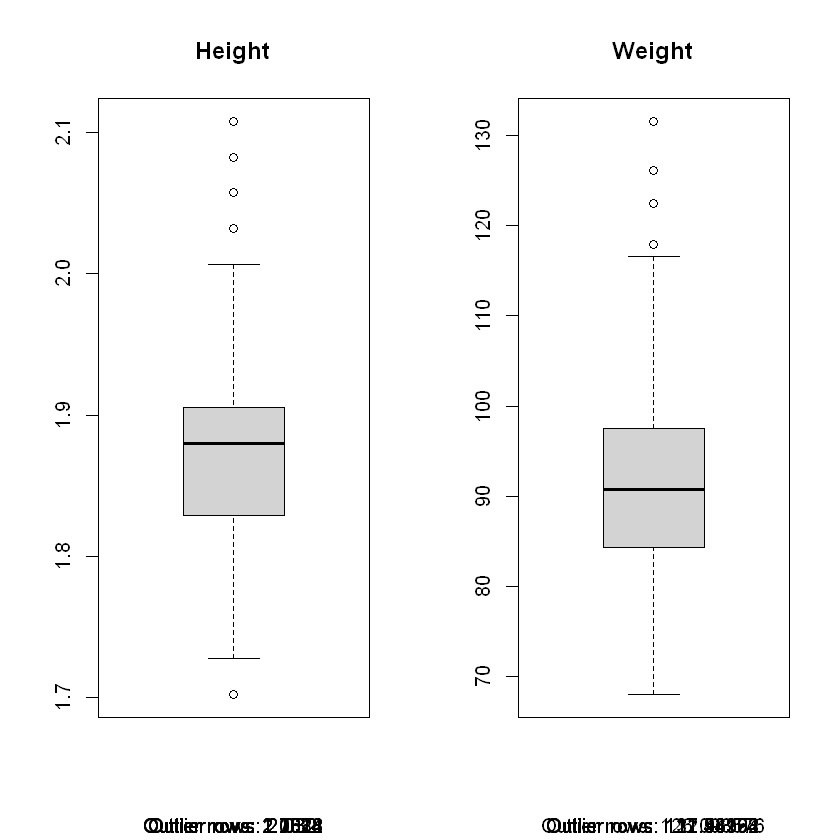

In [ ]:
# Boxplot to check for outliers
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(baseball$Height, main='Height',
        sub=paste('Outlier rows:', 
                  boxplot.stats(baseball$Height)$out))
boxplot(baseball$Weight, main='Weight',
        sub=paste('Outlier rows:',
                  boxplot.stats(baseball$Weight)$out))

In [ ]:
# calculate correlation between Width and Length
print(cor(baseball$Height, baseball$Weight))

[1] 0.5315393


In [ ]:
wt_outliers = c(boxplot.stats(baseball$Weight)$out)
print('wt_outliers:')
print(wt_outliers)

ht_outliers = c(boxplot.stats(baseball$Height)$out)
print('ht_outliers:')
print(ht_outliers)

# drop rows have outliers
print(paste('Before drop:', nrow(baseball)))
for(record in wt_outliers){
    baseball = baseball[baseball$Weight != record,]
}
for(record in ht_outliers){
    baseball = baseball[baseball$Height != record,]
}
print(paste('After drop:', nrow(baseball)))

[1] "wt_outliers:"
[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339
[1] "ht_outliers:"
 [1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018
[1] "Before drop: 1015"
[1] "After drop: 998"


In [ ]:
# Create the training (development) and test (validatiuon) data.
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex = sample(1:nrow(baseball), 0.7*nrow(baseball))
print('Selected training row indexes:')
# print(trainingRowIndex)
trainingData = baseball[trainingRowIndex,] # training data
testData = baseball[-trainingRowIndex,] # test data
print('Rows of training data and test data:')
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
[1] "Rows of training data and test data:"
[1] 698
[1] 300


In [ ]:
# Use Decision Tree
# Build model
baseball.tree = rpart(Weight~Height,
                      data = trainingData,
                      method = 'anova')
print(summary(baseball.tree))

Call:
rpart(formula = Weight ~ Height, data = trainingData, method = "anova")
  n= 698 

          CP nsplit rel error    xerror       xstd
1 0.15717992      0 1.0000000 1.0032151 0.04888121
2 0.02896649      1 0.8428201 0.8747585 0.04657139
3 0.02483727      2 0.8138536 0.8720701 0.04630771
4 0.01126342      3 0.7890163 0.8338157 0.04438520
5 0.01000000      4 0.7777529 0.8290693 0.04417677

Variable importance
Height 
   100 

Node number 1: 698 observations,    complexity param=0.1571799
  mean=90.84057, MSE=80.12391 
  left son=2 (340 obs) right son=3 (358 obs)
  Primary splits:
      Height < 1.8669 to the left,  improve=0.1571799, (0 missing)

Node number 2: 340 observations,    complexity param=0.02483727
  mean=87.19906, MSE=62.91233 
  left son=4 (223 obs) right son=5 (117 obs)
  Primary splits:
      Height < 1.8415 to the left,  improve=0.06493916, (0 missing)

Node number 3: 358 observations,    complexity param=0.02896649
  mean=94.29899, MSE=71.91557 
  left son=6 (226 ob

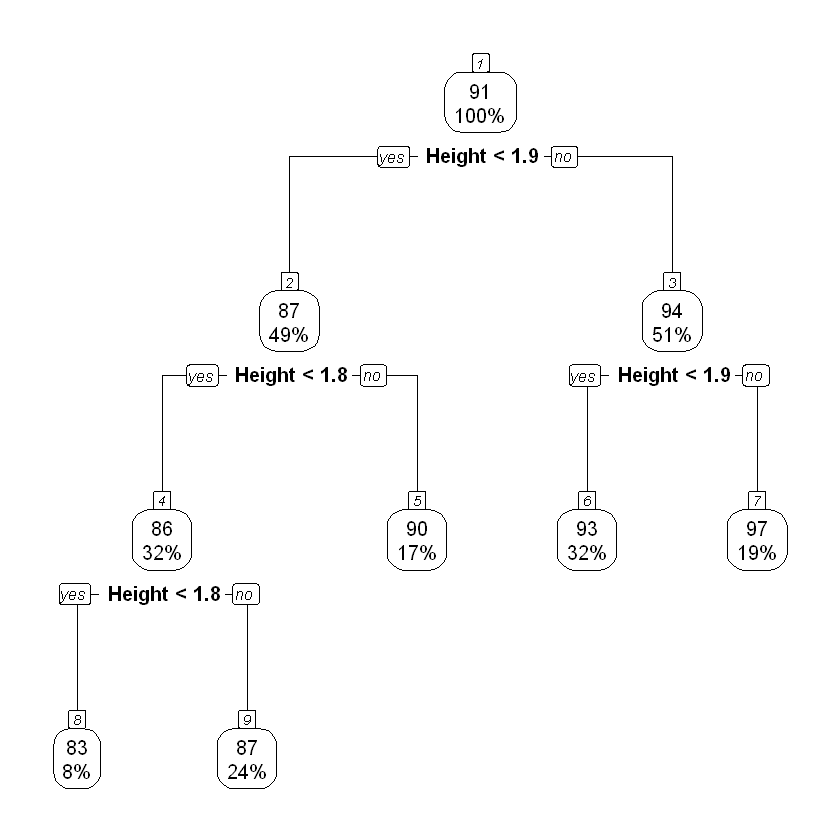

In [ ]:
# draw tree 
library(rpart.plot)
prp(baseball.tree, type = 2, extra='auto',
    nn = TRUE, branch = 1, varlen=0, yesno=2)

In [ ]:
# test model 
pred_new = predict(baseball.tree, testData, type = 'vector')

# mean square error of testData
mse_test = mean((testData$Weight - pred_new)^2)
print(paste('mse in test:', mse_test))

[1] "mse in test: 57.8497168055646"


In [ ]:
# new predictions:
x = c(1.775, 1.825, 1.925)
y1 = predict(baseball.tree, data.frame(Height=x), type='vector')
print('Solution 2 - results:')
print(y1)

[1] "Solution 2 - results:"
       1        2        3 
82.72491 86.67343 97.08243 
